In [29]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("imdb-movies-dataset.csv")
df.tail()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020.0,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2020.0,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2020.0,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...
9999,https://m.media-amazon.com/images/M/MV5BMmE4ZD...,Un homme et une femme,2020.0,NaN,102.0,"Drama, Romance",7.5,NaN,Claude Lelouch,"Anouk Aimée, Jean-Louis Trintignant, Pierre Ba...","11,826",A widow and a widower find their relationship ...,61,Moved me tremendously.,This is a movie that resonated to my core. I ...


In [3]:
df.shape

(10000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster          10000 non-null  object 
 1   Title           10000 non-null  object 
 2   Year            9850 non-null   float64
 3   Certificate     7370 non-null   object 
 4   Duration (min)  9664 non-null   float64
 5   Genre           9993 non-null   object 
 6   Rating          9596 non-null   float64
 7   Metascore       7555 non-null   float64
 8   Director        9995 non-null   object 
 9   Cast            9961 non-null   object 
 10  Votes           9596 non-null   object 
 11  Description     10000 non-null  object 
 12  Review Count    9999 non-null   object 
 13  Review Title    9483 non-null   object 
 14  Review          9484 non-null   object 
dtypes: float64(4), object(11)
memory usage: 1.1+ MB


In [5]:
# checking for null values
df.isnull().sum()

Poster               0
Title                0
Year               150
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
Votes              404
Description          0
Review Count         1
Review Title       517
Review             516
dtype: int64

In [6]:
# step 1 drop duplicate data
df = df.drop_duplicates()

In [15]:
# remove any unwanted column
df = df.drop(columns= 'Metascore')
df.head()

,Title,Certificate,Duration (min),Genre,Rating,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,The Idea of You,R,115.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,Kingdom of the Planet of the Apes,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,Unfrosted,PG-13,97.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,The Fall Guy,PG-13,126.0,"Action, Comedy, Drama",7.3,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,Challengers,R,131.0,"Drama, Romance, Sport",7.7,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [19]:
df.tail()

,Title,Certificate,Duration (min),Genre,Rating,Director,Cast,Votes,Description,Review Count,Review Title,Review
9995,The Greatest Show on Earth,U,152.0,"Drama, Family, Romance",6.5,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,Berserk: Ougon Jidai-hen I - Haou no Tamago,NaN,76.0,"Animation, Action, Adventure",7.5,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,Is-slottet,NaN,78.0,"Mystery, Drama",6.5,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,Loving Pablo,A,123.0,"Biography, Crime, Drama",6.4,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...
9999,Un homme et une femme,NaN,102.0,"Drama, Romance",7.5,Claude Lelouch,"Anouk Aimée, Jean-Louis Trintignant, Pierre Ba...","11,826",A widow and a widower find their relationship ...,61,Moved me tremendously.,This is a movie that resonated to my core. I ...


In [20]:
df.tail()

,Title,Certificate,Duration (min),Genre,Rating,Director,Cast,Votes,Description,Review Count,Review Title,Review
9995,The Greatest Show on Earth,U,152.0,"Drama, Family, Romance",6.5,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,Berserk: Ougon Jidai-hen I - Haou no Tamago,NaN,76.0,"Animation, Action, Adventure",7.5,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,Is-slottet,NaN,78.0,"Mystery, Drama",6.5,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,Loving Pablo,A,123.0,"Biography, Crime, Drama",6.4,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...
9999,Un homme et une femme,NaN,102.0,"Drama, Romance",7.5,Claude Lelouch,"Anouk Aimée, Jean-Louis Trintignant, Pierre Ba...","11,826",A widow and a widower find their relationship ...,61,Moved me tremendously.,This is a movie that resonated to my core. I ...


In [23]:
# filling the missing values in duration with the mean value
mean_value = np.round(df['Duration (min)'].mean())

In [24]:
mean_value

109.0

In [25]:
# filling mean value
df['Duration (min)'] = df['Duration (min)'].fillna(mean_value)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           10000 non-null  object 
 1   Certificate     7370 non-null   object 
 2   Duration (min)  10000 non-null  float64
 3   Genre           9993 non-null   object 
 4   Rating          9596 non-null   float64
 5   Director        9995 non-null   object 
 6   Cast            9961 non-null   object 
 7   Votes           9596 non-null   object 
 8   Description     10000 non-null  object 
 9   Review Count    9999 non-null   object 
 10  Review Title    9483 non-null   object 
 11  Review          9484 non-null   object 
dtypes: float64(2), object(10)
memory usage: 937.6+ KB


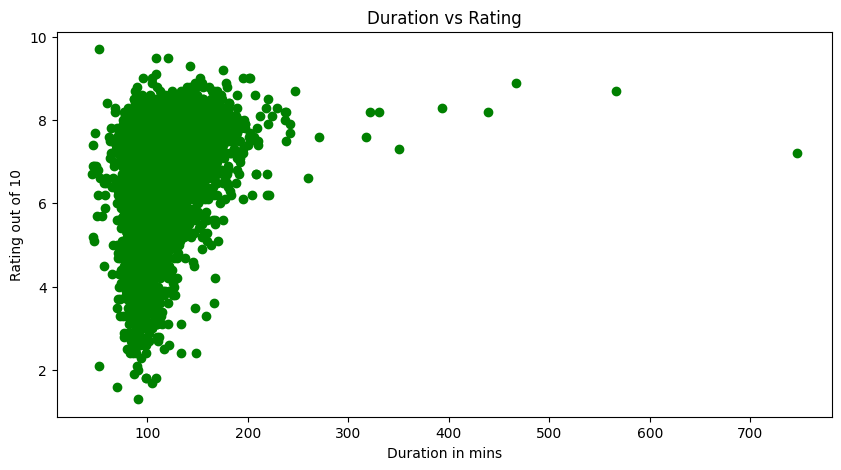

In [36]:
# plot the duration and rating duration of films
plt.figure(figsize = (10, 5))
plt.scatter(df['Duration (min)'], df['Rating'], color = 'g', label = 'Bars')
plt.title('Duration vs Rating')
plt.xlabel('Duration in mins')
plt.ylabel('Rating out of 10')
plt.show()

In [38]:
df.describe()

,Duration (min),Rating
count,10000.000000,9596.000000
mean,108.816000,6.438610
std,22.767327,1.051412
min,45.000000,1.300000
25%,95.000000,5.800000
50%,105.000000,6.500000
75%,118.000000,7.200000
max,746.000000,9.700000


There is an outlier (746) present in the duration column lets remove it

In [39]:
df_clean = df[(df['Duration (min)'] <= 300)]

In [41]:
df_clean.describe()

,Duration (min),Rating
count,9991.000000,9587.000000
mean,108.520769,6.437081
std,20.143552,1.050584
min,45.000000,1.300000
25%,95.000000,5.800000
50%,105.000000,6.500000
75%,118.000000,7.200000
max,271.000000,9.700000


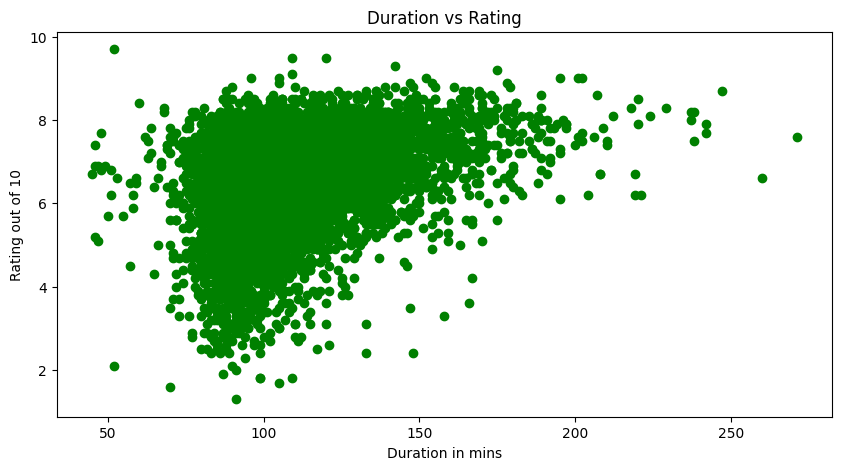

In [42]:
# plot the duration and rating duration of films after outlier removal
plt.figure(figsize = (10, 5))
plt.scatter(df_clean['Duration (min)'], df_clean['Rating'], color = 'g', label = 'Bars')
plt.title('Duration vs Rating')
plt.xlabel('Duration in mins')
plt.ylabel('Rating out of 10')
plt.show()

In the duration column of the dataset there are some outliers are present. We need to remove it.
In the above cell all the outliers above 300 are removed, one can visualize it using the scatter plot above.